In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Datasets_ML/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Decision tree using diabetes dataset

In [ ]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [ ]:
x=data.iloc[:,:-2]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


In [ ]:
y=data.iloc[:,-1:]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=dc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7597402597402597


[Text(0.5, 0.875, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = y[0]'),
 Text(0.25, 0.625, 'BMI <= 26.95\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = y[0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BloodPressure <= 94.0\ngini = 0.05\nsamples = 116\nvalue = [113, 3]\nclass = y[0]'),
 Text(0.0625, 0.125, 'gini = 0.035\nsamples = 112\nvalue = [110, 2]\nclass = y[0]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = y[0]'),
 Text(0.375, 0.375, 'Pregnancies <= 3.5\ngini = 0.391\nsamples = 274\nvalue = [201, 73]\nclass = y[0]'),
 Text(0.3125, 0.125, 'gini = 0.281\nsamples = 160\nvalue = [133, 27]\nclass = y[0]'),
 Text(0.4375, 0.125, 'gini = 0.481\nsamples = 114\nvalue = [68, 46]\nclass = y[0]'),
 Text(0.75, 0.625, 'BMI <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]\nclass = y[1]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Glucose <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]\nclass = 

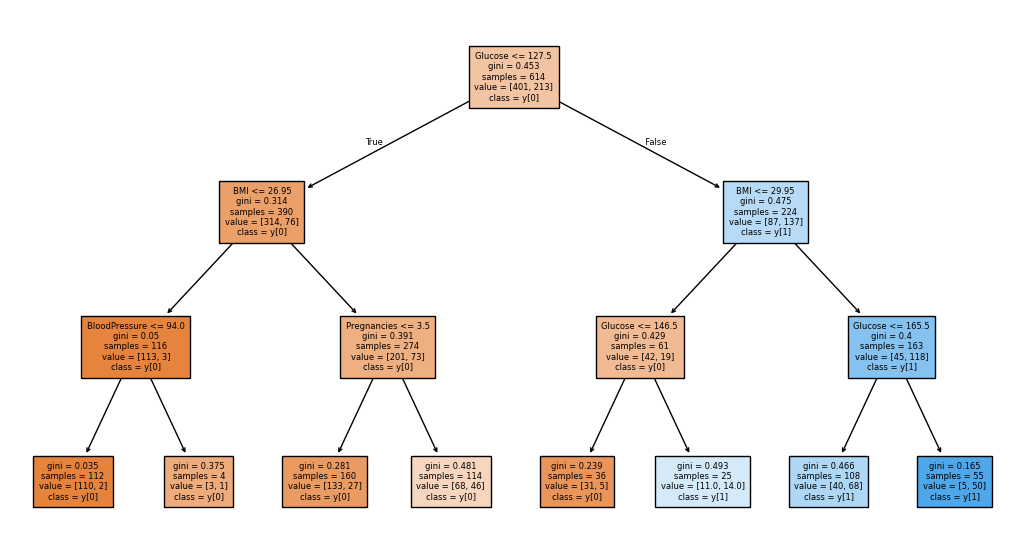

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(13,7))
plot_tree(dc,feature_names=x.columns,class_names=True,filled=True,fontsize=6)

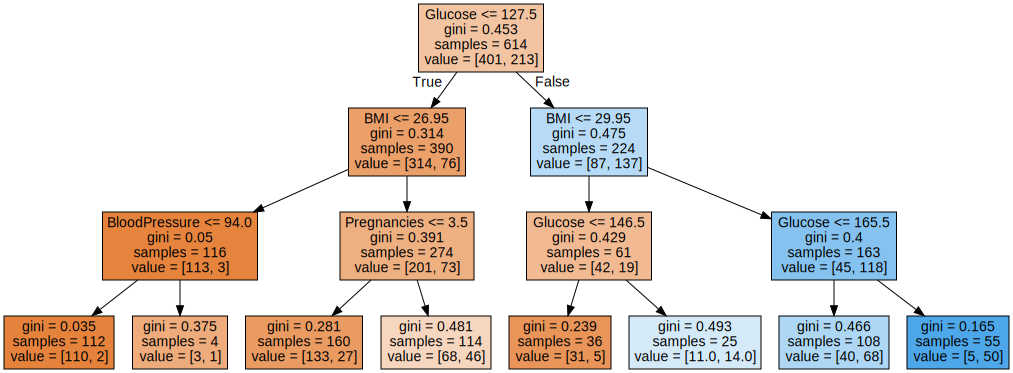

In [ ]:
from sklearn.tree import export_graphviz
import graphviz as gr
gr.Source(export_graphviz(dc,feature_names=x.columns,filled=True))